In [18]:
import pandas as pd
import numpy as np 
import networkx as nx
import matplotlib.pyplot as plt
import tqdm

import torch
from torch import Tensor
from torch.nn import Linear

from torch_geometric.data import Data
from torch_geometric.loader import DataLoader, LinkNeighborLoader
import torch_geometric.transforms as T
from torch_geometric.nn import SAGEConv, GCNConv
import torch.nn.functional as F
from torch_geometric.utils import to_networkx

In [19]:
node_df = pd.read_csv(r"C:\Users\wchen\OneDrive - Dartmouth College\Dartmouth\QSS82\spotify\nodes.csv")
edges_df = pd.read_csv(r"C:\Users\wchen\OneDrive - Dartmouth College\Dartmouth\QSS82\spotify\edges.csv")

## Process Node Attributes

In [1]:
# Data on each artist 
node_df

NameError: name 'node_df' is not defined

In [21]:
# Edge list of collaborations between artists 
edges_df

,id_0,id_1
0,76M2Ekj8bG8W7X2nbx2CpF,7sfl4Xt5KmfyDs2T3SVSMK
1,0hk4xVujcyOr6USD95wcWb,7Do8se3ZoaVqUt3woqqSrD
2,38jpuy3yt3QIxQ8Fn1HTeJ,4csQIMQm6vI2A2SCVDuM2z
3,6PvcxssrQ0QaJVaBWHD07l,6UCQYrcJ6wab6gnQ89OJFh
4,2R1QrQqWuw3IjoP5dXRFjt,4mk1ScvOUkuQzzCZpT6bc0
...,...,...
300381,0PK0Dx3s9et0Uf4XbdFpiW,6SmpksRq3jxeDZ7roKDb6F
300382,5hqRsNHDZH1jHzI9LgxFRZ,7KYseTkErcYMRvcIqacxUq
300383,0wjb0t7aYMuIwyuXnPOilh,2p1fiYHYiXz9qi0JJyxBzN
300384,3ciRvbBIVz9fBoPbtSYq4x,5einkgXXrjhfYCyac1FANB


In [5]:
node_df.shape

(156422, 6)

In [6]:
5712/19726

0.2895670688431512

In [7]:
node_df.loc[(node_df["popularity"]==0)]

,spotify_id,name,followers,popularity,genres,chart_hits
16,4kYtSSCtizbVfZkgAj4Xbe,Cosmos Insania,17.0,0,[],['hn (3)']
18,5mjhFqCEMhIwO4ZOYlycHH,GeeSixFive,517.0,0,[],['za (1)']
32,7pnSkMU0hGGIay6tPvbsCo,Khea,296.0,0,[],"['ar (1)', 'bo (1)', 'cl (1)', 'py (1)', 'uy (..."
43,7IpcJM0UZeU4b2SV9YRCqx,Alika,28254.0,0,[],['id (1)']
79,1s0U0EGo1JZZLMk3PMvmAX,Jonzmen,140.0,0,[],['do (1)']
...,...,...,...,...,...,...
156395,5LeDgikLe1hfnpLfB3I6WP,Young Wonde,0.0,0,[],NaN
156400,2KOsAy4MUJjPMUWejM5njD,Hovmester Grov,5.0,0,[],NaN
156407,420RXBZJK7pCFy3pouIJKw,Osieko,0.0,0,[],NaN
156412,21XKEmJiODYHNQwAqA8uGu,Nino Gucci,3.0,0,[],NaN


In [8]:
node_df.loc[(node_df["popularity"]==0) & (node_df["followers"]==0)]

,spotify_id,name,followers,popularity,genres,chart_hits
192,0z2GNeBgnQO3UPOmqpAi1X,Jeff,0.0,0,[],['tr (1)']
214,5Cbb6xFbK9HY3T2HvC0Wwm,Christmas Zero,0.0,0,[],['ee (1)']
322,1lEmHQmPVkmg8mQrQt1bH4,Empress In Road,0.0,0,[],['ee (1)']
340,2zNBaFfKa0B5x3e9ieMscI,Oldzzies,0.0,0,[],['ee (1)']
377,1jGH20nvJkL1AZfJDEPaHM,Yo Dawg Z,0.0,0,[],['ee (1)']
...,...,...,...,...,...,...
156348,7vLjEzbXeiys8hd2ASmhnE,laureta,0.0,0,[],NaN
156373,0IsaU9609JFDlFT8hwjgRa,Васік,0.0,0,[],NaN
156377,6OISlQJdIpXjd5jyBPRX7H,Jp Palmer,0.0,0,[],NaN
156395,5LeDgikLe1hfnpLfB3I6WP,Young Wonde,0.0,0,[],NaN


In [9]:
node_df.shape

(156422, 6)

In [10]:
19726/node_df.shape[0]

0.1261075807750828

In [11]:
node_df["popularity"].describe()

count    156422.000000
mean         21.157497
std          18.338290
min           0.000000
25%           4.000000
50%          18.000000
75%          34.000000
max         100.000000
Name: popularity, dtype: float64

In [12]:
node_df["followers"].describe()

count    1.564180e+05
mean     8.622371e+04
std      9.401001e+05
min      0.000000e+00
25%      2.400000e+01
50%      3.630000e+02
75%      6.258000e+03
max      1.021569e+08
Name: followers, dtype: float64

In [13]:
sum(node_df["followers"])

nan

In [6]:
node_df

,spotify_id,name,followers,popularity,genres,chart_hits
0,48WvrUGoijadXXCsGocwM4,Byklubben,1738.0,24,"['nordic house', 'russelater']",['no (3)']
1,4lDiJcOJ2GLCK6p9q5BgfK,Kontra K,1999676.0,72,"['christlicher rap', 'german hip hop']","['at (44)', 'de (111)', 'lu (22)', 'ch (31)', ..."
2,652XIvIBNGg3C0KIGEJWit,Maxim,34596.0,36,[],['de (1)']
3,3dXC1YPbnQPsfHPVkm1ipj,Christopher Martin,249233.0,52,"['dancehall', 'lovers rock', 'modern reggae', ...","['at (1)', 'de (1)']"
4,74terC9ol9zMo8rfzhSOiG,Jakob Hellman,21193.0,39,"['classic swedish pop', 'norrbotten indie', 's...",['se (6)']
...,...,...,...,...,...,...
156417,2ces6d2YsQP1RpGMYpdFy8,David Urwitz,5470.0,29,['classic swedish pop'],NaN
156418,6AeznZajNbXUulT7W4tK5l,Darmiko,2022.0,23,[],NaN
156419,3GEijIjrgb4lPe9WtURBzz,Katriell,268.0,0,[],NaN
156420,0ldQL0icSoMz9OOZcWG8Zt,Yung Fresh,181.0,19,[],NaN


In [15]:
node_df.loc[node_df["followers"]==0]

,spotify_id,name,followers,popularity,genres,chart_hits
192,0z2GNeBgnQO3UPOmqpAi1X,Jeff,0.0,0,[],['tr (1)']
214,5Cbb6xFbK9HY3T2HvC0Wwm,Christmas Zero,0.0,0,[],['ee (1)']
322,1lEmHQmPVkmg8mQrQt1bH4,Empress In Road,0.0,0,[],['ee (1)']
340,2zNBaFfKa0B5x3e9ieMscI,Oldzzies,0.0,0,[],['ee (1)']
377,1jGH20nvJkL1AZfJDEPaHM,Yo Dawg Z,0.0,0,[],['ee (1)']
...,...,...,...,...,...,...
156373,0IsaU9609JFDlFT8hwjgRa,Васік,0.0,0,[],NaN
156377,6OISlQJdIpXjd5jyBPRX7H,Jp Palmer,0.0,0,[],NaN
156394,4uHlE3sTkqRAnLdSSU0a20,Mr.N,0.0,3,[],NaN
156395,5LeDgikLe1hfnpLfB3I6WP,Young Wonde,0.0,0,[],NaN


In [16]:
8081/node_df.shape[0]

0.05166153098668985

In [17]:
max(node_df["followers"])

102156853.0

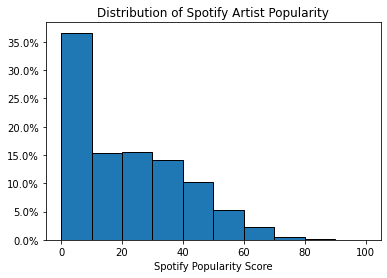

In [30]:
# Distribution of artist popularity
#node_df["popularity"].hist()
from matplotlib.ticker import PercentFormatter


plt.hist(node_df["popularity"], weights=np.ones(len(node_df)) / len(node_df), edgecolor='black')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel("Spotify Popularity Score")
plt.title("Distribution of Spotify Artist Popularity")
plt.show()

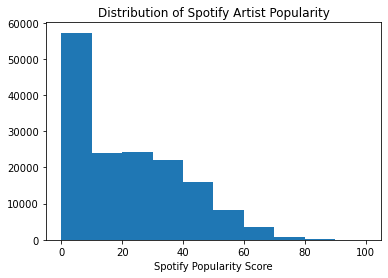

In [18]:
# Distribution of artist popularity
#node_df["popularity"].hist()
from matplotlib.ticker import PercentFormatter


plt.hist(node_df["popularity"], weights=np.ones(len(df)) / len(df), edgecolor='black')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.xlabel("Spotify Popularity Score")
plt.title("Distribution of Spotify Artist Popularity")
plt.show()

In [8]:
node_df["genres"] = node_df["genres"].apply(lambda x: x[1:-1])
#node_df["genres"] = node_df["genres"].apply(lambda x: x.split(','))
#node_df["n_genres"] = node_df["genres"].apply(lambda x: 0 if x[0]=="" else len(x))
node_df["spotify_id"] = node_df["spotify_id"].astype(str)
#node_df.reset_index(inplace=True)

In [15]:
node_df["genres"] = node_df["genres"].apply(lambda x: x.split(','))
node_df["n_genres"] = node_df["genres"].apply(lambda x: 0 if x[0]=="" else len(x))
node_df

C:\Users\wchen\AppData\Local\Temp/ipykernel_1384/1837551570.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  node_df["genres"] = node_df["genres"].apply(lambda x: x.split(','))
C:\Users\wchen\AppData\Local\Temp/ipykernel_1384/1837551570.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  node_df["n_genres"] = node_df["genres"].apply(lambda x: 0 if x[0]=="" else len(x))


,spotify_id,name,followers,popularity,genres,chart_hits,n_genres
0,48WvrUGoijadXXCsGocwM4,Byklubben,1738.0,24,"['nordic house', 'russelater']",['no (3)'],2
1,4lDiJcOJ2GLCK6p9q5BgfK,Kontra K,1999676.0,72,"['christlicher rap', 'german hip hop']","['at (44)', 'de (111)', 'lu (22)', 'ch (31)', ...",2
2,652XIvIBNGg3C0KIGEJWit,Maxim,34596.0,36,[],['de (1)'],0
3,3dXC1YPbnQPsfHPVkm1ipj,Christopher Martin,249233.0,52,"['dancehall', 'lovers rock', 'modern reggae'...","['at (1)', 'de (1)']",4
4,74terC9ol9zMo8rfzhSOiG,Jakob Hellman,21193.0,39,"['classic swedish pop', 'norrbotten indie', ...",['se (6)'],3
...,...,...,...,...,...,...,...
156417,2ces6d2YsQP1RpGMYpdFy8,David Urwitz,5470.0,29,['classic swedish pop'],NaN,1
156418,6AeznZajNbXUulT7W4tK5l,Darmiko,2022.0,23,[],NaN,0
156419,3GEijIjrgb4lPe9WtURBzz,Katriell,268.0,0,[],NaN,0
156420,0ldQL0icSoMz9OOZcWG8Zt,Yung Fresh,181.0,19,[],NaN,0


In [143]:
# Generate dummy variables for each music genre 
# Takes some time to run, use the outputted dummies file instead
genres = node_df['genres'].str.get_dummies(',')
genres

,"""children's choir""","""children's music""","""jackin' house""","""man's orchestra""","""muzika l'yeladim""","""preschool children's music""","""punk 'n' roll""","""quartetto d'archi""","""women's choir""","""women's music""",...,'zhenskiy rep','zhongguo feng','zim hip hop','zim urban groove','zimdancehall','zohioliin duu','zouk riddim','zouk','zurich indie','zxc'
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156417,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
156418,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
156419,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
156420,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [146]:
genres.to_csv("genres_encoded.csv")

In [148]:
genre_sum = genres.sum(axis=0)
genre_sum

 "children's choir"     5
 "children's music"     8
 "jackin' house"        7
 "man's orchestra"     15
 "muzika l'yeladim"     1
                       ..
'zohioliin duu'         1
'zouk riddim'          14
'zouk'                  9
'zurich indie'          1
'zxc'                   5
Length: 7838, dtype: int64

In [57]:
(7838-4957)/7838

0.3675682572084715

In [39]:
genre_sum = pd.DataFrame(genre_sums)
genre_sum.columns = ["count"]
genre_sum

,count
"""children's choir",5
"""children's music",8
"""jackin' house",7
"""man's orchestra",15
"""women's music",6
...,...
'zim urban groove',3
'zimdancehall',5
'zouk riddim',14
'zouk',9


array([[<AxesSubplot:title={'center':'count'}>]], dtype=object)

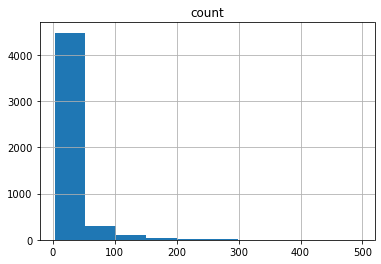

In [41]:
genre_sum.hist()

In [58]:
genre_sum.loc[genre_sum["count"]>200].index

Index([' 'edm'', ' 'electro house'', ' 'electronica'', ' 'electropop'',
       ' 'gangster rap'', ' 'hip hop'', ' 'house'', ' 'modern bollywood'',
       ' 'modern rock'', ' 'nueva musica mexicana'', ' 'pop dance'',
       ' 'pop edm'', ' 'pop rap'', ' 'pop rock'', ' 'pop urbaine'', ' 'pop'',
       ' 'r&b'', ' 'rap francais'', ' 'rap'', ' 'reggaeton'', ' 'rock'',
       ' 'southern hip hop'', ' 'taiwan pop'', ' 'trap latino'', ' 'trap'',
       ' 'tropical house'', ' 'tropical'', ' 'uk pop'',
       ' 'underground hip hop'', ' 'urban contemporary'', ''alternative r&b'',
       ''dance pop'', ''dutch hip hop'', ''finnish dance pop'',
       ''french hip hop'', ''funk carioca'', ''german hip hop'',
       ''italian hip hop'', ''k-pop'', ''v-pop''],
      dtype='object')

array([[<AxesSubplot:title={'center':'count'}>]], dtype=object)

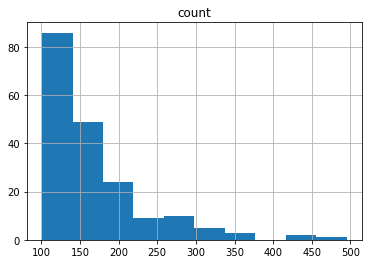

In [45]:
genre_sum.loc[genre_sum["count"]>100].hist()

array([[<AxesSubplot:title={'center':'count'}>]], dtype=object)

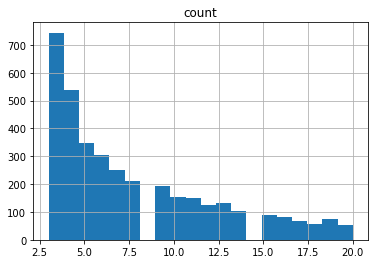

In [40]:
genre_sum.loc[genre_sum["count"]<21].hist(bins=20)

array([[<AxesSubplot:title={'center':'count'}>]], dtype=object)

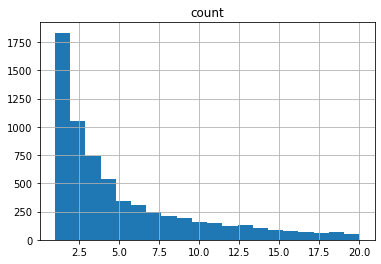

In [258]:
genre_sum.loc[genre_sum["count"]<21].hist(bins=20)

In [265]:
trivial = list(genre_sum.loc[genre_sum["count"]<3].index)

In [266]:
non_trivial_genres = genres.drop(trivial, axis=1, inplace=False)
non_trivial_genres

,"""children's choir""","""children's music""","""jackin' house""","""man's orchestra""","""women's music""",'afrikaans','afro soul','afropop','afroswing','albanian pop',...,'yoga','zambian hip hop','zen','zhenskiy rep','zim hip hop','zim urban groove','zimdancehall','zouk riddim','zouk','zxc'
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156417,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
156418,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
156419,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
156420,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [267]:
non_trivial_genres.to_csv("non_trivial_genres_encoded.csv")

In [12]:
non_trivial_genres = pd.read_csv("non_trivial_genres_encoded.csv", index_col = 0)

In [18]:
non_trivial_genres.drop(columns=non_trivial_genres.columns[0], axis=1,  inplace=True)

In [20]:
non_trivial_genres.columns = non_trivial_genres.columns.str.strip('"')

In [23]:
sum(non_trivial_genres["children's choir"])

21

In [26]:
genre_sums = non_trivial_genres.sum(axis=0)

In [35]:
genre_sums<100

 "children's choir    True
 "children's music    True
 "jackin' house       True
 "man's orchestra     True
 "women's music       True
                      ... 
'zim urban groove'    True
'zimdancehall'        True
'zouk riddim'         True
'zouk'                True
'zxc'                 True
Length: 4957, dtype: bool

In [63]:
gen_list = list(genre_sums.sort_values(ascending=False)[:50].index)

In [21]:
non_trivial_genres

,"""children's choir","""children's music","""jackin' house","""man's orchestra","""women's music",'afrikaans','afro soul','afropop','afroswing','albanian pop',...,'yoga','zambian hip hop','zen','zhenskiy rep','zim hip hop','zim urban groove','zimdancehall','zouk riddim','zouk','zxc'
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156417,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
156418,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
156419,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
156420,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [101]:
gen_top50 = non_trivial_genres[gen_list].copy()

In [100]:
gen_list

[" 'pop'",
 " 'electro house'",
 " 'rap'",
 " 'pop dance'",
 " 'pop rap'",
 " 'uk pop'",
 " 'hip hop'",
 " 'tropical house'",
 " 'trap'",
 " 'edm'",
 "'dance pop'",
 " 'r&b'",
 " 'trap latino'",
 " 'rock'",
 "'dutch hip hop'",
 "'k-pop'",
 "'french hip hop'",
 " 'southern hip hop'",
 "'german hip hop'",
 " 'pop urbaine'",
 "'funk carioca'",
 " 'electropop'",
 " 'urban contemporary'",
 " 'pop edm'",
 " 'gangster rap'",
 " 'underground hip hop'",
 " 'house'",
 " 'tropical'",
 " 'taiwan pop'",
 "'v-pop'",
 " 'nueva musica mexicana'",
 " 'rap francais'",
 " 'pop rock'",
 " 'electronica'",
 "'finnish dance pop'",
 " 'reggaeton'",
 "'alternative r&b'",
 " 'modern bollywood'",
 "'italian hip hop'",
 " 'modern rock'",
 "'latin hip hop'",
 "'desi pop'",
 "'francoton'",
 " 'post-teen pop'",
 " 'dance pop'",
 " 'filmi'",
 " 'musica mexicana'",
 " 'rock en espanol'",
 "'polish alternative rap'",
 "'bass house'"]

In [102]:
gen_top50["tot_genres"] = gen_top50.sum(axis=1)

In [103]:
sum(gen_top50["tot_genres"]>0)

7839

In [ ]:
df.sum(axis=0)

In [272]:
non_trivial_genres["tot_genres"] = non_trivial_genres.sum(axis=1)

In [145]:
genre_list = list(genres.columns)
genre_list

[' "children\'s choir"',
 ' "children\'s music"',
 ' "jackin\' house"',
 ' "man\'s orchestra"',
 ' "muzika l\'yeladim"',
 ' "preschool children\'s music"',
 ' "punk \'n\' roll"',
 ' "quartetto d\'archi"',
 ' "women\'s choir"',
 ' "women\'s music"',
 " 'acid trance'",
 " 'acoustic pop'",
 " 'adult standards'",
 " 'afrikaans gospel'",
 " 'afrikaans'",
 " 'afro house'",
 " 'afro soul'",
 " 'afrobeat'",
 " 'afrofuturismo brasileiro'",
 " 'afropop'",
 " 'afroswing'",
 " 'albanian pop'",
 " 'album rock'",
 " 'alte'",
 " 'alternative dance'",
 " 'alternative hip hop'",
 " 'alternative metal'",
 " 'alternative r&b'",
 " 'alternative rock'",
 " 'amapiano'",
 " 'ambient guitar'",
 " 'ambient house'",
 " 'ambient idm'",
 " 'ambient pop'",
 " 'ambient post-rock'",
 " 'ambient techno'",
 " 'ambient worship'",
 " 'ambient'",
 " 'american 21st century classical'",
 " 'american folk revival'",
 " 'american modern classical'",
 " 'american post-rock'",
 " 'american romanticism'",
 " 'anime rap'",
 " 'a

In [10]:
node_df.loc[node_df["name"]=="Alesso"]

,spotify_id,name,followers,popularity,genres,chart_hits
14163,4AVFqumd2ogHFlRbKIjp1t,Alesso,3845777.0,76,"'dance pop', 'edm', 'electro house', 'pop', 'p...","['us (8)', 'gb (7)', 'ar (4)', 'au (4)', 'at (..."


In [69]:
node_df.loc[node_df["popularity"]>75]

,spotify_id,name,followers,popularity,genres,chart_hits
23,6M2wZ9GZgrQXHCFfjv46we,Dua Lipa,36163788.0,88,"'dance pop', 'pop', 'uk pop'","['us (17)', 'gb (25)', 'ar (18)', 'au (20)', '..."
137,23fqKkggKUBHNkbKtXEls4,Kygo,8134874.0,80,"'edm', 'pop', 'pop dance', 'tropical house'","['us (28)', 'gb (24)', 'ar (9)', 'au (24)', 'a..."
230,360IAlyVv4PCEVjgyMZrxK,Miguel,4195623.0,77,"'dance pop', 'pop', 'r&b', 'urban contemporary'","['us (10)', 'gb (1)', 'ar (1)', 'au (4)', 'be ..."
242,4kYSro6naA4h99UJvo89HB,Cardi B,20361435.0,80,"'dance pop', 'pop', 'rap'","['us (19)', 'gb (17)', 'ar (2)', 'au (16)', 'a..."
273,5f7VJjfbwm532GiveGC0ZK,Lil Baby,11530234.0,89,"'atl hip hop', 'atl trap', 'rap', 'trap'","['us (62)', 'gb (16)', 'au (6)', 'at (3)', 'be..."
...,...,...,...,...,...,...
42928,25XJqeReVV38w0tR04GGBd,Mainstreet,218290.0,77,"'trap carioca', 'trap funk'",NaN
43495,34b7j3TqM5ramjmt2mc8tB,Chill Fruits Music,71692.0,76,'lo-fi product',NaN
68754,3xvaSlT4xsyk6lY1ESOspO,Disney,225230.0,82,,NaN
77196,1dABGukgZ8XKKOdd2rVSHM,Lofi Fruits Music,634698.0,77,"'lo-fi cover', 'lo-fi product'",NaN


In [107]:
node_df = pd.concat([node_df, gen_top50], axis = 1)

In [108]:
labeled_artists = node_df.loc[node_df["tot_genres"]>0].copy()

In [109]:
labeled_artists = labeled_artists.loc[labeled_artists["popularity"]>=75]

In [110]:
labeled_artists

,spotify_id,name,followers,popularity,genres,chart_hits,'pop','electro house','rap','pop dance',...,'desi pop','francoton','post-teen pop','dance pop','filmi','musica mexicana','rock en espanol','polish alternative rap','bass house',tot_genres
23,6M2wZ9GZgrQXHCFfjv46we,Dua Lipa,36163788.0,88,"['dance pop', 'pop', 'uk pop']","['us (17)', 'gb (25)', 'ar (18)', 'au (20)', '...",1,0,0,0,...,0,0,0,0,0,0,0,0,0,3
137,23fqKkggKUBHNkbKtXEls4,Kygo,8134874.0,80,"['edm', 'pop', 'pop dance', 'tropical house']","['us (28)', 'gb (24)', 'ar (9)', 'au (24)', 'a...",1,0,0,1,...,0,0,0,0,0,0,0,0,0,3
230,360IAlyVv4PCEVjgyMZrxK,Miguel,4195623.0,77,"['dance pop', 'pop', 'r&b', 'urban contemporary']","['us (10)', 'gb (1)', 'ar (1)', 'au (4)', 'be ...",1,0,0,0,...,0,0,0,0,0,0,0,0,0,4
242,4kYSro6naA4h99UJvo89HB,Cardi B,20361435.0,80,"['dance pop', 'pop', 'rap']","['us (19)', 'gb (17)', 'ar (2)', 'au (16)', 'a...",1,0,1,0,...,0,0,0,0,0,0,0,0,0,3
273,5f7VJjfbwm532GiveGC0ZK,Lil Baby,11530234.0,89,"['atl hip hop', 'atl trap', 'rap', 'trap']","['us (62)', 'gb (16)', 'au (6)', 'at (3)', 'be...",0,0,1,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19531,7f5Zgnp2spUuuzKplmRkt7,Lost Frequencies,2479248.0,77,"['belgian edm', 'edm', 'pop', 'pop dance', 'tr...","['us (1)', 'gb (4)', 'ar (4)', 'au (5)', 'at (...",1,0,0,1,...,0,0,0,0,0,0,0,0,0,4
19533,5K4W6rqBFWDnAN6FQUkS6x,Kanye West,18170307.0,91,"['chicago rap', 'rap']","['us (89)', 'gb (84)', 'ar (3)', 'au (81)', 'a...",0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
19550,1wZtkThiXbVNtj6hee6dz9,Wisin & Yandel,5655168.0,79,"['electro latino', 'latin hip hop', 'reggaeton...","['ar (5)', 'bo (7)', 'cl (13)', 'co (8)', 'cr ...",0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
63462,1Oa0bMld0A3u5OTYfMzp5h,Nate Dogg,1300744.0,75,"['g funk', 'gangster rap', 'hip hop', 'pop rap...",NaN,0,0,1,0,...,0,0,0,0,0,0,0,0,0,4


In [22]:
duplicates = node_df.loc[node_df.duplicated(subset=["spotify_id"])==True].sort_values(by='popularity', ascending=False)

In [23]:
duplicates

,spotify_id,name,followers,popularity,genres,chart_hits
17509,4IKVDbCSBTxBeAsMKjAuTs,Armaan Malik,15289921.0,72,"['desi pop', 'filmi', 'modern bollywood']",['in (14)']
8992,1gBUSTR3TyDdTVFIaQnc02,NCT DREAM,5398388.0,72,"['k-pop', 'k-pop boy group']","['hk (3)', 'id (24)', 'jp (2)', 'my (12)', 'ph..."
11148,44mEtidu0VdRkIqO4IbkNa,Marca MP,1417712.0,72,"['corrido', 'corridos tumbados', 'musica mexic...","['sv (1)', 'gt (2)', 'hn (1)', 'mx (4)', 'ni (..."
18449,3FoFW2AoUGRHBacC6i4x4p,Russ Millions,259.0,71,"['melodic drill', 'uk drill']","['gb (5)', 'au (2)', 'at (1)', 'be (2)', 'bg (..."
32421,5QNm7E7RU2m64l6Gliu8Oy,HARDY,199970.0,71,"['contemporary country', 'country', 'country r...",NaN
...,...,...,...,...,...,...
69158,0xHANYVyAfbp6GmjPKcOad,Harris Baba,17492.0,21,[],NaN
14077,6tVsUWjip0Tnp1EyCRX5XH,Cyrus Villanueva,9555.0,21,['australian talent show'],['au (2)']
108921,3HYI2IcaBzTQo2ZeykcvUS,Adrian Fu,1071.0,17,['cantopop'],NaN
5321,6Dv2ZL1IvCZlbSzjjj7l3w,Lidl Suomi,1997.0,17,[],['fi (1)']


In [26]:
duplicate_df = node_df[node_df['name'].isin(duplicates["name"].values)]
duplicate_df

,spotify_id,name,followers,popularity,genres,chart_hits
349,0fM4WhKpjJZc3a0eX947Tc,Sirius,1.0,25,[],NaN
359,6SGCqG5HEr5gFZR9ct8wID,Matías Valdez,44663.0,58,['cumbia pop'],['uy (11)']
443,1B0fCkXH620aujSMm3wIKS,Sura İskenderli,362407.0,54,"['turkish pop', 'turkish trap pop']","['cy (1)', 'tr (4)']"
571,3T0mKZYTDmRODhPJYsQNoz,Mr. Crazy,194766.0,40,"['moroccan pop', 'rai', 'rap maroc']",['ma (1)']
769,6RDpAm5XMUZqVZlBJ1UYQw,Starian,2.0,45,[],NaN
...,...,...,...,...,...,...
134987,0fM4WhKpjJZc3a0eX947Tc,Sirius,1501.0,25,[],NaN
153014,4R3mugkUqCALXgkwSptTbg,Đạt G,195773.0,39,['vietnamese hip hop'],NaN
153099,0fAxJ75WJT3STJb3xWtpbc,MOLY,102882.0,43,"['dominican pop', 'modern salsa', 'pop peruano...",NaN
154938,50u2mXgysmTttY0BizYWAo,Movimiento Original,17.0,62,"['chilean rock', 'rap chileno', 'reggae en esp...",['cl (4)']


In [33]:
ddf = duplicate_df.sort_values(by=['name','followers'], ascending=False).drop_duplicates('name')
ddf

,spotify_id,name,followers,popularity,genres,chart_hits
3695,7hJBfmab67blVoqZBIAx13,鄧福如 AFÜ,41471.0,45,"['mandopop', 'taiwan pop', 'taiwan singer-song...",['tw (4)']
13960,5o5xHep3Xy0SHWx4dXMVS4,Руслан Утюг,10703.0,34,['russian indie rock'],"['ru (1)', 'ua (1)']"
153014,4R3mugkUqCALXgkwSptTbg,Đạt G,195773.0,39,['vietnamese hip hop'],NaN
772,5VZr6vX1UPRRf9tneUEi2B,siilawy,250402.0,50,['middle east hip hop'],"['eg (1)', 'ma (1)', 'sa (1)']"
11367,2wukjJRRIwHwy6TW0UMUiD,joel music,3054.0,36,[],['cl (1)']
...,...,...,...,...,...,...
5031,5RqcTk3xp9dW1BLsdQ0NE9,Aerozen,33617.0,49,['romanian trap'],['ro (10)']
108921,3HYI2IcaBzTQo2ZeykcvUS,Adrian Fu,1071.0,17,['cantopop'],NaN
11147,2DWVv9ET0trhdmdFYROQaJ,A/DA 阿達,1989.0,29,"['chinese hip hop', 'chinese r&b', 'taiwan pop']",['tw (2)']
7185,6noxsCszBEEK04kCehugOp,A-Mei Chang,680051.0,58,"['c-pop', 'mandopop', 'taiwan pop']","['my (2)', 'sg (1)', 'tw (40)']"


In [25]:
node_df.loc[node_df["name"]=="Harris Baba"]

,spotify_id,name,followers,popularity,genres,chart_hits
3700,0xHANYVyAfbp6GmjPKcOad,Harris Baba,1.0,21,[],NaN
69158,0xHANYVyAfbp6GmjPKcOad,Harris Baba,17492.0,21,[],NaN


In [ ]:
node_df.loc[node_df["name"]=="Kygo"]

In [122]:
node_df.loc[node_df['spotify_id'].isin(duplicates["spotify_id"].values)]

,spotify_id,name,followers,popularity,genres,chart_hits,n_genres
349,0fM4WhKpjJZc3a0eX947Tc,Sirius,1.0,25,[],NaN,0
359,6SGCqG5HEr5gFZR9ct8wID,Matías Valdez,44663.0,58,['cumbia pop'],['uy (11)'],1
443,1B0fCkXH620aujSMm3wIKS,Sura İskenderli,362407.0,54,"['turkish pop', 'turkish trap pop']","['cy (1)', 'tr (4)']",2
571,3T0mKZYTDmRODhPJYsQNoz,Mr. Crazy,194766.0,40,"['moroccan pop', 'rai', 'rap maroc']",['ma (1)'],3
769,6RDpAm5XMUZqVZlBJ1UYQw,Starian,2.0,45,[],NaN,0
...,...,...,...,...,...,...,...
134987,0fM4WhKpjJZc3a0eX947Tc,Sirius,1501.0,25,[],NaN,0
153014,4R3mugkUqCALXgkwSptTbg,Đạt G,195773.0,39,['vietnamese hip hop'],NaN,1
153099,0fAxJ75WJT3STJb3xWtpbc,MOLY,102882.0,43,"['dominican pop', 'modern salsa', 'pop perua...",NaN,5
154938,50u2mXgysmTttY0BizYWAo,Movimiento Original,17.0,62,"['chilean rock', 'rap chileno', 'reggae en e...",['cl (4)'],3


In [34]:
# Drop duplicates for now 
# Removes 200 rows 
node_df = node_df[~node_df['spotify_id'].isin(duplicates["spotify_id"].values)]

In [35]:
node_df

,spotify_id,name,followers,popularity,genres,chart_hits
0,48WvrUGoijadXXCsGocwM4,Byklubben,1738.0,24,"['nordic house', 'russelater']",['no (3)']
1,4lDiJcOJ2GLCK6p9q5BgfK,Kontra K,1999676.0,72,"['christlicher rap', 'german hip hop']","['at (44)', 'de (111)', 'lu (22)', 'ch (31)', ..."
2,652XIvIBNGg3C0KIGEJWit,Maxim,34596.0,36,[],['de (1)']
3,3dXC1YPbnQPsfHPVkm1ipj,Christopher Martin,249233.0,52,"['dancehall', 'lovers rock', 'modern reggae', ...","['at (1)', 'de (1)']"
4,74terC9ol9zMo8rfzhSOiG,Jakob Hellman,21193.0,39,"['classic swedish pop', 'norrbotten indie', 's...",['se (6)']
...,...,...,...,...,...,...
156417,2ces6d2YsQP1RpGMYpdFy8,David Urwitz,5470.0,29,['classic swedish pop'],NaN
156418,6AeznZajNbXUulT7W4tK5l,Darmiko,2022.0,23,[],NaN
156419,3GEijIjrgb4lPe9WtURBzz,Katriell,268.0,0,[],NaN
156420,0ldQL0icSoMz9OOZcWG8Zt,Yung Fresh,181.0,19,[],NaN


In [36]:
node_df = pd.concat([node_df, ddf])
node_df

,spotify_id,name,followers,popularity,genres,chart_hits
0,48WvrUGoijadXXCsGocwM4,Byklubben,1738.0,24,"['nordic house', 'russelater']",['no (3)']
1,4lDiJcOJ2GLCK6p9q5BgfK,Kontra K,1999676.0,72,"['christlicher rap', 'german hip hop']","['at (44)', 'de (111)', 'lu (22)', 'ch (31)', ..."
2,652XIvIBNGg3C0KIGEJWit,Maxim,34596.0,36,[],['de (1)']
3,3dXC1YPbnQPsfHPVkm1ipj,Christopher Martin,249233.0,52,"['dancehall', 'lovers rock', 'modern reggae', ...","['at (1)', 'de (1)']"
4,74terC9ol9zMo8rfzhSOiG,Jakob Hellman,21193.0,39,"['classic swedish pop', 'norrbotten indie', 's...",['se (6)']
...,...,...,...,...,...,...
5031,5RqcTk3xp9dW1BLsdQ0NE9,Aerozen,33617.0,49,['romanian trap'],['ro (10)']
108921,3HYI2IcaBzTQo2ZeykcvUS,Adrian Fu,1071.0,17,['cantopop'],NaN
11147,2DWVv9ET0trhdmdFYROQaJ,A/DA 阿達,1989.0,29,"['chinese hip hop', 'chinese r&b', 'taiwan pop']",['tw (2)']
7185,6noxsCszBEEK04kCehugOp,A-Mei Chang,680051.0,58,"['c-pop', 'mandopop', 'taiwan pop']","['my (2)', 'sg (1)', 'tw (40)']"


Text(0.5, 1.0, '')

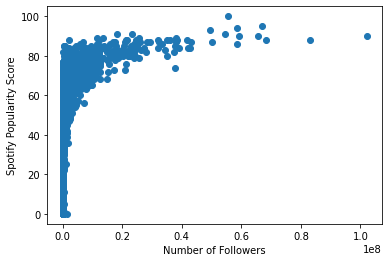

In [37]:
# Correlation between followers and popularity
node_df["followers"].corr(node_df["popularity"])
plt.scatter(node_df["followers"], node_df["popularity"])
plt.xlabel("Number of Followers")
plt.ylabel("Spotify Popularity Score")
plt.title("")

Logarithmic relationship between followers and popularity

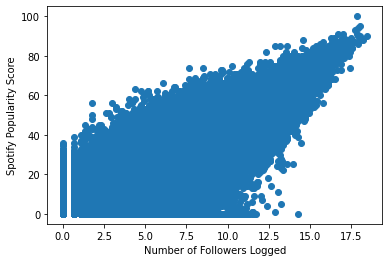

In [13]:
nonzero_nodes = node_df.loc[node_df["followers"]>0]
plt.scatter(np.log(nonzero_nodes["followers"]), nonzero_nodes["popularity"])
plt.xlabel("Number of Followers Logged")
plt.ylabel("Spotify Popularity Score")
plt.show()

In [38]:
node_df["log_followers"] = np.log(node_df["followers"])

C:\Users\wchen\.conda\envs\spotify\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [39]:
node_df["popularity"].corr(node_df["log_followers"])

nan

In [40]:
# Run twice 
node_df.reset_index(inplace=True)
node_df.reset_index(inplace=True)

In [41]:
node_df

,level_0,index,spotify_id,name,followers,popularity,genres,chart_hits,log_followers
0,0,0,48WvrUGoijadXXCsGocwM4,Byklubben,1738.0,24,"['nordic house', 'russelater']",['no (3)'],7.460490
1,1,1,4lDiJcOJ2GLCK6p9q5BgfK,Kontra K,1999676.0,72,"['christlicher rap', 'german hip hop']","['at (44)', 'de (111)', 'lu (22)', 'ch (31)', ...",14.508496
2,2,2,652XIvIBNGg3C0KIGEJWit,Maxim,34596.0,36,[],['de (1)'],10.451493
3,3,3,3dXC1YPbnQPsfHPVkm1ipj,Christopher Martin,249233.0,52,"['dancehall', 'lovers rock', 'modern reggae', ...","['at (1)', 'de (1)']",12.426143
4,4,4,74terC9ol9zMo8rfzhSOiG,Jakob Hellman,21193.0,39,"['classic swedish pop', 'norrbotten indie', 's...",['se (6)'],9.961426
...,...,...,...,...,...,...,...,...,...
156315,156315,5031,5RqcTk3xp9dW1BLsdQ0NE9,Aerozen,33617.0,49,['romanian trap'],['ro (10)'],10.422787
156316,156316,108921,3HYI2IcaBzTQo2ZeykcvUS,Adrian Fu,1071.0,17,['cantopop'],NaN,6.976348
156317,156317,11147,2DWVv9ET0trhdmdFYROQaJ,A/DA 阿達,1989.0,29,"['chinese hip hop', 'chinese r&b', 'taiwan pop']",['tw (2)'],7.595387
156318,156318,7185,6noxsCszBEEK04kCehugOp,A-Mei Chang,680051.0,58,"['c-pop', 'mandopop', 'taiwan pop']","['my (2)', 'sg (1)', 'tw (40)']",13.429923


In [56]:
node_df.loc[node_df["spotify_id"]=="3FoFW2AoUGRHBacC6i4x4p"]

,level_0,index,spotify_id,name,followers,popularity,genres,chart_hits,n_genres


In [42]:
print("% of artists with genre labels",node_df.loc[node_df["n_genres"]>0].shape[0]/node_df.shape[0]*100)

KeyError: 'n_genres'

In [43]:
#node_ids = node_df["spotify_id"]
node_attrs = torch.tensor(node_df[["followers", "popularity"]].values)

In [44]:
len(node_attrs)

156320

In [ ]:
node_df.loc[node_df["spotify_id"]=="4N0EUas6rgOC46pdItA4lS"].index.values[0]

## Process Node Connections

In [45]:
edges_df

,id_0,id_1
0,76M2Ekj8bG8W7X2nbx2CpF,7sfl4Xt5KmfyDs2T3SVSMK
1,0hk4xVujcyOr6USD95wcWb,7Do8se3ZoaVqUt3woqqSrD
2,38jpuy3yt3QIxQ8Fn1HTeJ,4csQIMQm6vI2A2SCVDuM2z
3,6PvcxssrQ0QaJVaBWHD07l,6UCQYrcJ6wab6gnQ89OJFh
4,2R1QrQqWuw3IjoP5dXRFjt,4mk1ScvOUkuQzzCZpT6bc0
...,...,...
300381,0PK0Dx3s9et0Uf4XbdFpiW,6SmpksRq3jxeDZ7roKDb6F
300382,5hqRsNHDZH1jHzI9LgxFRZ,7KYseTkErcYMRvcIqacxUq
300383,0wjb0t7aYMuIwyuXnPOilh,2p1fiYHYiXz9qi0JJyxBzN
300384,3ciRvbBIVz9fBoPbtSYq4x,5einkgXXrjhfYCyac1FANB


In [46]:
artist_key = node_df[["level_0", "spotify_id"]]
artist_key.columns = ["artist1", "id_0"]
artist_key

,artist1,id_0
0,0,48WvrUGoijadXXCsGocwM4
1,1,4lDiJcOJ2GLCK6p9q5BgfK
2,2,652XIvIBNGg3C0KIGEJWit
3,3,3dXC1YPbnQPsfHPVkm1ipj
4,4,74terC9ol9zMo8rfzhSOiG
...,...,...
156315,156315,5RqcTk3xp9dW1BLsdQ0NE9
156316,156316,3HYI2IcaBzTQo2ZeykcvUS
156317,156317,2DWVv9ET0trhdmdFYROQaJ
156318,156318,6noxsCszBEEK04kCehugOp


In [47]:
edges_df_merge = edges_df.merge(artist_key, how = 'left', on='id_0', indicator=True)
#artist_key.columns = []
#edges_df_merge = edges_df_merge.merge()

In [48]:
# Remove any connections with unknown artist IDs
# 812 connections removed 
edges_df_merge = edges_df_merge[edges_df_merge['_merge']=='both']
edges_df_merge.drop('_merge', axis=1, inplace=True)
#edges_df.shape[0]-edges_df_merge.shape[0]

In [49]:
edges_df_merge

,id_0,id_1,artist1
0,76M2Ekj8bG8W7X2nbx2CpF,7sfl4Xt5KmfyDs2T3SVSMK,51041.0
1,0hk4xVujcyOr6USD95wcWb,7Do8se3ZoaVqUt3woqqSrD,8847.0
2,38jpuy3yt3QIxQ8Fn1HTeJ,4csQIMQm6vI2A2SCVDuM2z,141199.0
3,6PvcxssrQ0QaJVaBWHD07l,6UCQYrcJ6wab6gnQ89OJFh,23869.0
4,2R1QrQqWuw3IjoP5dXRFjt,4mk1ScvOUkuQzzCZpT6bc0,10418.0
...,...,...,...
300397,0PK0Dx3s9et0Uf4XbdFpiW,6SmpksRq3jxeDZ7roKDb6F,14084.0
300398,5hqRsNHDZH1jHzI9LgxFRZ,7KYseTkErcYMRvcIqacxUq,9462.0
300399,0wjb0t7aYMuIwyuXnPOilh,2p1fiYHYiXz9qi0JJyxBzN,115823.0
300400,3ciRvbBIVz9fBoPbtSYq4x,5einkgXXrjhfYCyac1FANB,9335.0


In [46]:
edges_df_merge.loc[edges_df_merge["artist1"]>156221]

,id_0,id_1,artist1
115,420RXBZJK7pCFy3pouIJKw,78GAAGOGzgrn8qnQiOgCLI,156407.0
1498,53eUBks0g3RdTEs8yP3yLV,7uRM93dnA7EtkC70fdC2Pf,156406.0
2653,1QZqarAGs0Lxx495oNcBnZ,1QvyquqkuuwUzdszyoKIy4,156421.0
5579,0By75sLZQ06mWyzNiSdLUB,2iK1rsbYstkSVn57M4s8ut,156396.0
9125,0M2gBC5BB11jlc06poRNy0,4PLGokgPkAapRsKDwXq408,156250.0
...,...,...,...
293368,4hSXlFNrTw8iVgsfELvDik,5aIqB5nVVvmFsvSdExz408,156367.0
293789,0Wkm45quqfx3NepJpXDvwE,57okaLdCtv3nVBSn5otJkp,156330.0
294792,4AX8qk503XKjxofmVjQy4x,4sTQVOfp9vEMCemLw50sbu,156276.0
299230,0Wkm45quqfx3NepJpXDvwE,2x7EATekOPhFGRx3syMGEC,156330.0


In [50]:
artist_key.columns = ["artist2", "id_1"]
edges_df_merge = edges_df_merge.merge(artist_key, how='left', on = 'id_1', indicator=True)

In [51]:
edges_df_merge = edges_df_merge[edges_df_merge['_merge']=='both']

In [52]:
edges_df_merge

,id_0,id_1,artist1,artist2,_merge
0,76M2Ekj8bG8W7X2nbx2CpF,7sfl4Xt5KmfyDs2T3SVSMK,51041.0,1928.0,both
1,0hk4xVujcyOr6USD95wcWb,7Do8se3ZoaVqUt3woqqSrD,8847.0,19355.0,both
2,38jpuy3yt3QIxQ8Fn1HTeJ,4csQIMQm6vI2A2SCVDuM2z,141199.0,6082.0,both
3,6PvcxssrQ0QaJVaBWHD07l,6UCQYrcJ6wab6gnQ89OJFh,23869.0,14072.0,both
4,2R1QrQqWuw3IjoP5dXRFjt,4mk1ScvOUkuQzzCZpT6bc0,10418.0,152675.0,both
...,...,...,...,...,...
300393,0PK0Dx3s9et0Uf4XbdFpiW,6SmpksRq3jxeDZ7roKDb6F,14084.0,123886.0,both
300394,5hqRsNHDZH1jHzI9LgxFRZ,7KYseTkErcYMRvcIqacxUq,9462.0,137508.0,both
300395,0wjb0t7aYMuIwyuXnPOilh,2p1fiYHYiXz9qi0JJyxBzN,115823.0,3067.0,both
300396,3ciRvbBIVz9fBoPbtSYq4x,5einkgXXrjhfYCyac1FANB,9335.0,33814.0,both


In [50]:
edges_df_merge.loc[edges_df_merge["artist2"]>156221]

,id_0,id_1,artist1,artist2,_merge
1746,1XU5MjR4kex9BGyY4UMtta,5lAQFO6hfHrg4ewny6Z042,16529.0,156393.0,both
2512,0QjKfMzP9b1zUvwjyrSPk5,2VHWEFv1AYYZS7y6nZOKTg,4507.0,156376.0,both
16541,3gd8FJtBJtkRxdfbTu19U2,7B2edU3Q7btJoNsoHCNohM,9581.0,156320.0,both
18380,15EdXJSvJSrjOGXsIimK0d,6Ss3HQTUk6PeyD1a0IV6RB,177.0,156344.0,both
19829,5UopXhshFFqRIMfeZrBclq,6AeznZajNbXUulT7W4tK5l,12054.0,156418.0,both
...,...,...,...,...,...
290167,0AspLZGQkP38yddNoD0pLn,2GZ0VsYD0N5Gb3EOIELa1N,4592.0,156255.0,both
292400,11OHTUETXL6VR3cnv9KNF1,2Ttg7IJ8C7bQS9FIUz6RgD,1079.0,156321.0,both
293006,0d3APB2jngaBHrA0DZHJYp,3qS3ibXxArdVpvaUUyTLRp,17755.0,156293.0,both
295041,0jfo4K7lhf6pWZjQsVtcFF,3y4ewLvOmnU25MTRpWIjOJ,7426.0,156314.0,both


In [53]:
edges_df_merge["artist1"].describe()

count    300396.000000
mean      40076.926004
std       45623.553795
min           0.000000
25%        8082.000000
50%       16104.000000
75%       67582.000000
max      156319.000000
Name: artist1, dtype: float64

In [54]:
edges_df_merge.drop(["id_0", "id_1", '_merge'], axis=1, inplace=True)

In [55]:
edges_df_merge

,artist1,artist2
0,51041.0,1928.0
1,8847.0,19355.0
2,141199.0,6082.0
3,23869.0,14072.0
4,10418.0,152675.0
...,...,...
300393,14084.0,123886.0
300394,9462.0,137508.0
300395,115823.0,3067.0
300396,9335.0,33814.0


In [56]:
edges_df2 = edges_df_merge.copy()
edges_df2.columns = ["artist2", "artist1"]
edges_df2

,artist2,artist1
0,51041.0,1928.0
1,8847.0,19355.0
2,141199.0,6082.0
3,23869.0,14072.0
4,10418.0,152675.0
...,...,...
300393,14084.0,123886.0
300394,9462.0,137508.0
300395,115823.0,3067.0
300396,9335.0,33814.0


In [57]:
edges_df_directed = pd.concat([edges_df_merge, edges_df2])
edges_df_directed

,artist1,artist2
0,51041.0,1928.0
1,8847.0,19355.0
2,141199.0,6082.0
3,23869.0,14072.0
4,10418.0,152675.0
...,...,...
300393,123886.0,14084.0
300394,137508.0,9462.0
300395,3067.0,115823.0
300396,33814.0,9335.0


In [58]:
edges = torch.tensor(edges_df_directed.values, dtype=torch.long)
edges

tensor([[ 51041,   1928],
        [  8847,  19355],
        [141199,   6082],
        ...,
        [  3067, 115823],
        [ 33814,   9335],
        [ 26580,  12267]])

## Load Data into Graph

In [59]:
# Create the graph object 
graph = Data(x=node_attrs, edge_index=edges.t().contiguous())

In [60]:
graph

Data(x=[156320, 2], edge_index=[2, 600792])

In [61]:
graph.edge_index

tensor([[ 51041,   8847, 141199,  ...,   3067,  33814,  26580],
        [  1928,  19355,   6082,  ..., 115823,   9335,  12267]])

In [62]:
graph.validate(raise_on_error=True)

True

In [63]:
graph.num_nodes
graph.num_edges
graph.num_node_features
graph.has_isolated_nodes()
graph.has_self_loops()
graph.is_directed()

False

In [67]:
node_df.shape[0]

156320

In [68]:
edges_df_directed.shape[0]/node_df.shape[0]

3.8433469805527123

In [71]:
G = to_networkx(graph, to_undirected=True)

In [72]:
print(nx.transitivity(G))

0.03833895104624252
